# MODELING .2 with PCA

In [1]:
    #import the packages that I will need for the projects
import pandas as pd
import pyreadstat as prs #in order to read SPSS files
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [3]:
    #Read the data with the labels in csv format
data = pd.read_csv('W35_May18/ATP W35_modeling_dataset.csv',index_col='Unnamed: 0')

In [4]:
print(data.shape)
data.head()

(4193, 49)


,Computer_Decisions,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,...,religion__4.0,religion__5.0,religion__6.0,religion__6.5,religion__7.0,religion__8.0,religion__9.0,religion__10.0,religion__11.0,religion__12.0
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#seperate dependent variables and other features
target = data['Computer_Decisions']
features = data.drop(['Computer_Decisions'], axis=1)

### Scaling the features

In [6]:
#scale data
sc=StandardScaler()
X_scaled= pd.DataFrame(sc.fit_transform(features),columns=features.columns)

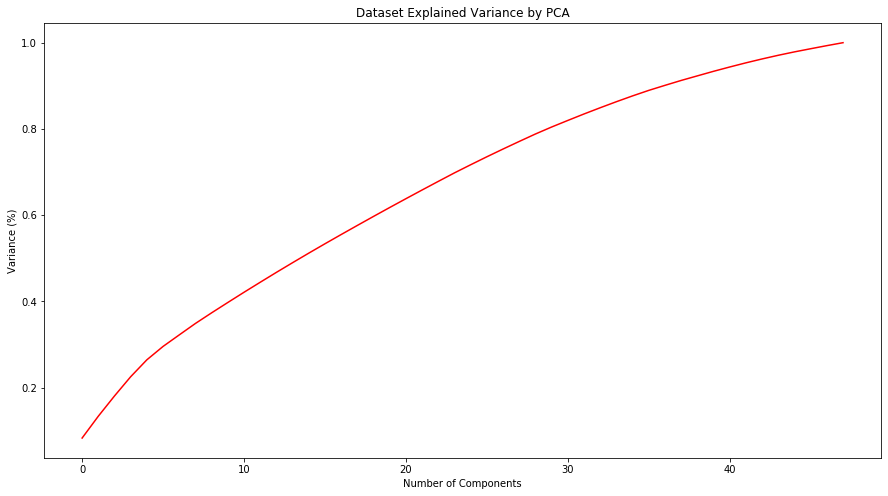

In [7]:
#Fitting the PCA algorithm with the scaled Data
pca = PCA().fit(X_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='r')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance by PCA')
plt.show()

In [8]:
#run PCA for the selected components
pca = PCA(n_components=35)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.08330639 0.0505925  0.04697549 0.04462994 0.03921038 0.03100392
 0.0267487  0.02654084 0.02462732 0.02397533 0.02368244 0.02319185
 0.02293814 0.02245944 0.0221372  0.02173123 0.02139501 0.02112062
 0.0209056  0.02068046 0.02039544 0.02018621 0.01996394 0.01973679
 0.01881639 0.01848177 0.01797793 0.01758338 0.01723956 0.01618647
 0.01522218 0.01498962 0.0144075  0.01400935 0.01347153]

 Total Variance Explained: 87.65


In [10]:
#Create the header for the df where I will save the PCA
header = []
for i in range(35):
    header.append("PC"+str(i+1))

header

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35']

In [11]:
# Create a new dataset from principal components only
df_X_pca = pd.DataFrame(data = X_pca
             , columns = header)

print(df_X_pca.shape)
df_X_pca.head(5)

(4193, 35)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,0.672210,-2.307300,1.674209,-0.286257,-2.094827,1.343916,-0.656877,-0.530967,0.426914,-1.831975,...,-0.570675,-0.028688,-0.625042,-0.382677,-1.037722,0.073856,-0.821398,0.253258,0.598950,-0.343691
1,1.664715,1.506745,1.430860,-1.235835,0.599778,0.905357,0.273541,1.829229,0.710569,0.142205,...,-1.182098,1.275965,-1.048452,-0.212488,0.108183,0.921155,-0.054307,0.415998,0.159711,-0.877483
2,0.640554,1.505656,1.076639,-2.987362,-0.479450,-0.578843,0.366363,-1.162268,-1.216359,-0.202781,...,0.741722,0.367609,0.131525,-0.242227,0.603986,0.517115,1.053620,0.276294,-0.335559,0.209543
3,0.380380,-0.806150,-0.005538,0.096132,0.706372,-0.374279,-0.184632,0.661560,2.496167,1.137086,...,-0.063971,0.441741,-0.070967,-0.595939,2.170566,-0.344158,-0.739147,0.339634,-0.682239,-0.309612
4,-1.787558,2.140403,-0.142391,-0.882038,-0.418574,-1.119452,-0.235278,-2.552002,-0.892509,-1.244367,...,0.697998,0.483030,0.162638,0.581394,0.063115,-0.635329,-0.955201,0.004048,0.225171,0.452687


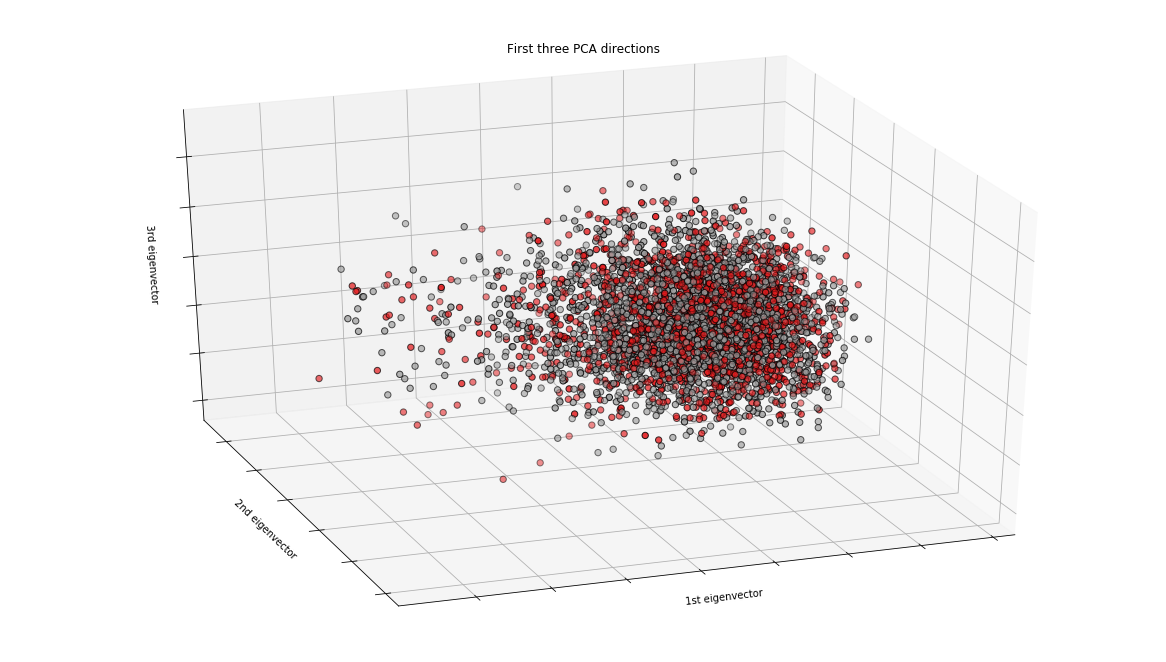

The number of features in the new subspace is  35


In [14]:
#Visualize top 3 components
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40,)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_pca.shape[1])

## Train Test Split

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(df_X_pca, target, test_size=0.2,random_state=45)

In [16]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

3354 839 3354 839


In [17]:
type(X_train)

pandas.core.frame.DataFrame

In [18]:
#Change the name to run codes for models easier
X_train_scaled= X_train
X_test_scaled = X_test

In [19]:
X_train_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
2142,1.275531,-0.750762,-4.710368,0.727511,1.210495,1.451819,-0.683692,1.543961,0.384656,0.209331,...,0.493609,-0.542080,-0.276724,0.045121,-1.301173,0.204514,0.640026,-0.008236,0.517415,-0.900613
1962,-4.425649,2.287167,0.757259,0.594662,-0.022751,-0.180081,-0.443948,1.196974,-0.032499,2.040420,...,-0.287205,-0.098537,0.603799,0.421406,0.128032,1.036217,-0.615267,-1.148992,-1.534554,-0.712234
3081,-0.121312,-0.758998,-1.608409,-1.495024,1.498280,-1.819896,-0.072838,-0.205761,-0.117734,-1.044461,...,-0.773297,-0.383556,0.408500,1.360989,-0.537129,0.437049,0.111041,0.344525,-0.567319,0.099536
4126,-1.784885,-0.148676,0.848586,-0.871104,-0.025782,-0.313307,-1.613936,-0.557624,0.410806,0.059984,...,-0.197714,0.906372,-1.011012,1.584802,-0.348859,0.173070,-0.302879,0.799860,0.026447,0.099228
537,0.769393,3.795429,-2.357865,-1.889772,-3.110138,-0.130931,-2.391580,-1.140307,-0.321617,-1.193520,...,0.216017,-0.230396,-0.843167,-0.034541,1.575894,1.070401,-0.359328,-0.581491,-0.541553,1.450019


* ### HELPERS

In [20]:
#print out the evaluation metrics for the test predictions stored in test_preds
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [21]:
# Helper function to calculate the evaluation Metric
def performance(y_true, y_predict):
    
    score = f1_score(y_true,y_predict)
    # Return the score
    return score

In [22]:
def plot_feature_importances(model):
    n_features = X_train_scaled.shape[1]
    figsize=(30,12)
    
    feat_imp = pd.DataFrame({'importance': model.feature_importances_})    
    feat_imp['feature'] = X_train_scaled.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:n_features]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    
    feat_imp.plot.barh(align='center',figsize=figsize) 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.title("Representation of features importance in the model")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

In [23]:
def performance_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('** TRAINING PERFORMANCE **')
    print('-> Accuracy Score:', accuracy_score(y_train, model.predict(X_train_scaled)) )
    print('-> Precision Score: {}'.format(precision_score(y_train, model.predict(X_train_scaled))))
    print('-> Recall Score: {}'.format(recall_score(y_train, model.predict(X_train_scaled))))
    print('-> F1 Score: {}'.format(f1_score(y_train, model.predict(X_train_scaled))))
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1] ))
    
    print('\n** TESTING PERFORMANCE')
    print('-> Accuracy Score:', accuracy_score(y_test, model.predict(X_test_scaled)) )
    print('-> Precision Score: {}'.format(precision_score(y_test, model.predict(X_test_scaled))))
    print('-> Recall Score: {}'.format(recall_score(y_test, model.predict(X_test_scaled))))
    print('-> F1 Score: {}'.format(f1_score(y_test, model.predict(X_test_scaled))))
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1],pos_label=1)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

# Test different models with all the variables

### baseline model - Dummy Classifier

Dummy stratified
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.5259391771019678
-> Precision Score: 0.39384615384615385
-> Recall Score: 0.38863287250384027
-> F1 Score: 0.3671083398285268
-> AUC: 0.5055795851636259

** TESTING PERFORMANCE
-> Accuracy Score: 0.5280095351609059
-> Precision Score: 0.35060975609756095
-> Recall Score: 0.38095238095238093
-> F1 Score: 0.35034013605442177
-> AUC: 0.4736035698683143



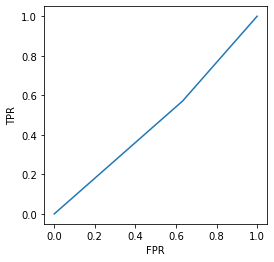

Dummy most_frequent
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6118067978533095
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.6495828367103695
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5



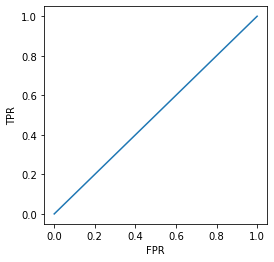

Dummy prior
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6118067978533095
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.6495828367103695
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5



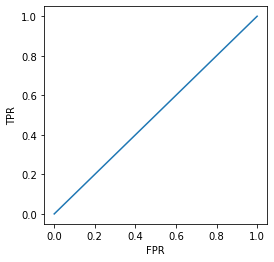

Dummy uniform
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.5
-> Precision Score: 0.3953488372093023
-> Recall Score: 0.47772657450076805
-> F1 Score: 0.4361158432708688
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.4803337306317044
-> Precision Score: 0.34375
-> Recall Score: 0.4897959183673469
-> F1 Score: 0.4016973125884017
-> AUC: 0.5



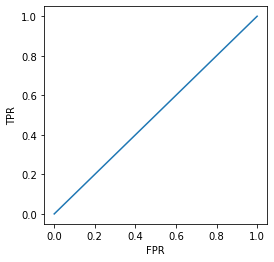

In [24]:
# Baseline (AUC should be 0.5 because we're guessing even though the accuracies are different)
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train_scaled, y_train)
    performance_model(dummy, 'Dummy {}'.format(strategy), plot=True)

### LOGISTIC

In [25]:
# #1 fit a predict a logistic regression and show metrics
print('LOGISTIC\n')
print('-'*30)

logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)
test_preds=logr.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

LOGISTIC

------------------------------

True Positives: 502
True Negatives: 47
False Positives: 247
False Negatives: 43


,0,1
0,47,247
1,43,502


Logistic
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6252236135957067
-> Precision Score: 0.5609756097560976
-> Recall Score: 0.15898617511520738
-> F1 Score: 0.24775583482944344
-> AUC: 0.6052856154723727

** TESTING PERFORMANCE
-> Accuracy Score: 0.6543504171632897
-> Precision Score: 0.5222222222222223
-> Recall Score: 0.1598639455782313
-> F1 Score: 0.2447916666666667
-> AUC: 0.5905136366473195



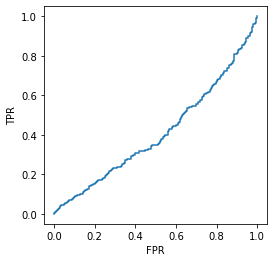

In [26]:
performance_model(logr, 'Logistic', plot=True)

### KNN

In [27]:
# #2 K Nearest Neighbors with all features
print('First K Nearest Neighbors')
print('--'*30)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
test_preds=knn.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

First K Nearest Neighbors
------------------------------------------------------------

True Positives: 400
True Negatives: 81
False Positives: 213
False Negatives: 145


,0,1
0,81,213
1,145,400


K-NN
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.7131782945736435
-> Precision Score: 0.6767151767151767
-> Recall Score: 0.5
-> F1 Score: 0.5750883392226148
-> AUC: 0.761926096603516

** TESTING PERFORMANCE
-> Accuracy Score: 0.5733015494636472
-> Precision Score: 0.3584070796460177
-> Recall Score: 0.2755102040816326
-> F1 Score: 0.3115384615384615
-> AUC: 0.5357018036572427



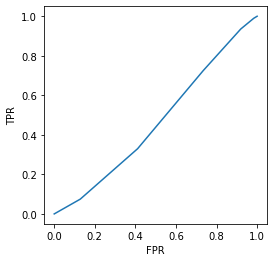

In [28]:
performance_model(knn,'K-NN',plot=True)

In [29]:
#try different values for k and return the model with the highest f1
def find_best_k(X_train, y_train, X_test, y_test, min_k=5, max_k=32):
    best_k = 0
    best_score = 0.0
    for k in range(min_k,max_k+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    print("Accuracy: {}".format(accuracy_score(y_test, preds)))

In [30]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 6
F1-Score: 0.4031496062992126
Accuracy: 0.6269368295589988


In [31]:
# #2 K Nearest Neighbors after tuning
print('First K Nearest Neighbors')
print('-'*30)
knn_t = KNeighborsClassifier(n_neighbors=6)
knn_t.fit(X_train_scaled, y_train)
test_preds=knn_t.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

First K Nearest Neighbors
------------------------------

True Positives: 332
True Negatives: 128
False Positives: 166
False Negatives: 213


,0,1
0,128,166
1,213,332


K-NN after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.689922480620155
-> Precision Score: 0.5923836389280677
-> Recall Score: 0.6451612903225806
-> F1 Score: 0.6176470588235294
-> AUC: 0.7371769103164122

** TESTING PERFORMANCE
-> Accuracy Score: 0.5482717520858165
-> Precision Score: 0.375366568914956
-> Recall Score: 0.43537414965986393
-> F1 Score: 0.4031496062992126
-> AUC: 0.5419303501217001



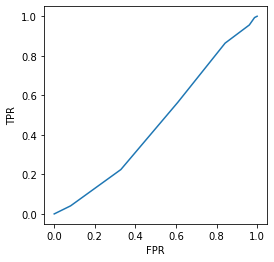

In [32]:
performance_model(knn_t,'K-NN after tuning',plot=True)

### DECISION TREE

In [33]:
#3 Decision Trees (Baseline)
print('DECISION TREE\n')
dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train_scaled, y_train)
test_preds=dtc.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

DECISION TREE


True Positives: 357
True Negatives: 126
False Positives: 168
False Negatives: 188


,0,1
0,126,168
1,188,357


Decision Tree
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 1.0
-> Precision Score: 1.0
-> Recall Score: 1.0
-> F1 Score: 1.0
-> AUC: 1.0

** TESTING PERFORMANCE
-> Accuracy Score: 0.5756853396901073
-> Precision Score: 0.4012738853503185
-> Recall Score: 0.42857142857142855
-> F1 Score: 0.4144736842105263
-> AUC: 0.5418086500655308



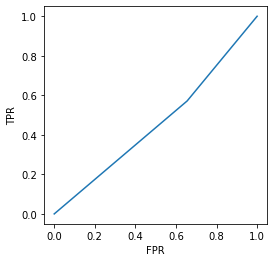

In [34]:
performance_model(dtc,"Decision Tree",plot=True)

#### --> Hyperparameter Tuning

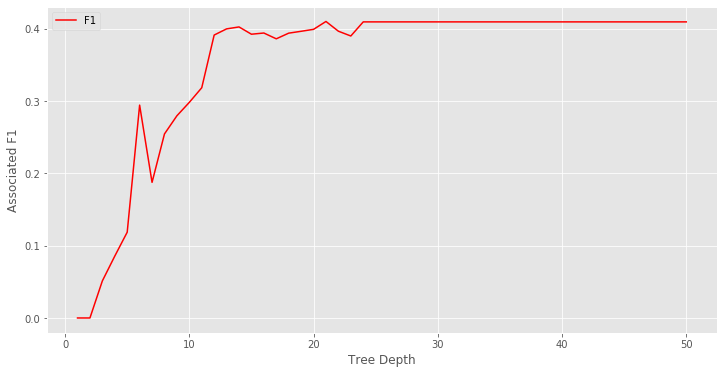

In [62]:
# Find the best tree depth for a depth range: 1-50
plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
f1_results = []

for max_depth in max_depths:
    clsf = DecisionTreeClassifier(max_depth=max_depth, random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(max_depths, f1_results, 'r', label='F1')
plt.xlabel('Tree Depth')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

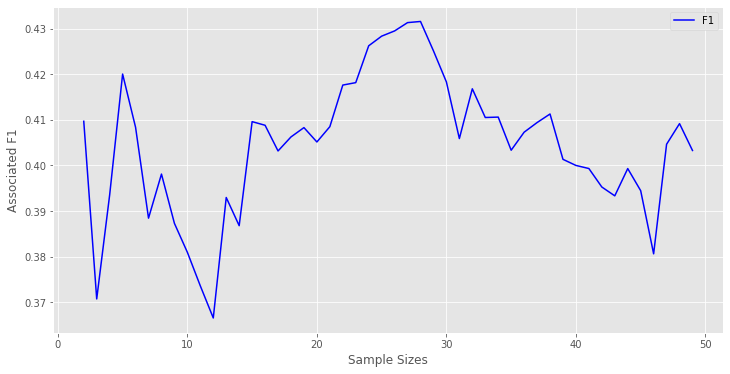

In [63]:
# Find the best min_samples_split
min_samples_splits = np.arange(2,50)
f1_results = []

for min_samples_split in min_samples_splits:
    clsf = DecisionTreeClassifier(min_samples_split=int(min_samples_split), random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, f1_results, 'b', label='F1')
plt.xlabel('Sample Sizes')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

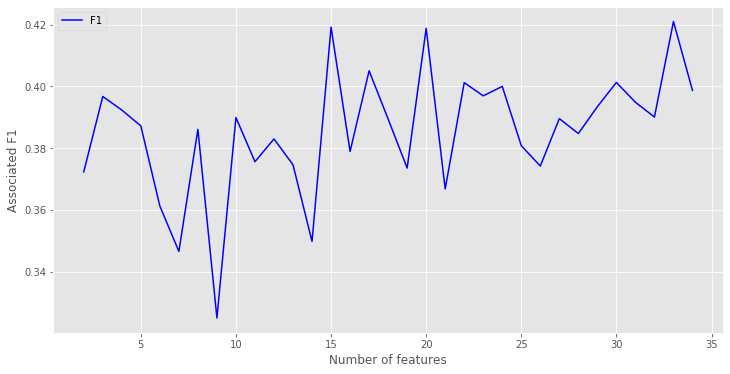

In [64]:
# Find the max_features
max_features = np.arange(2,35)
f1_results = []

for feature in max_features:
    clsf = DecisionTreeClassifier(max_features=int(feature), random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(max_features, f1_results, 'b', label='F1')
plt.xlabel('Number of features')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

In [35]:
print('DECISION TREE')
print('-'*20)
dtc_t = DecisionTreeClassifier(min_samples_split=28, max_depth=21,max_features=34,random_state=45)
dtc_t.fit(X_train_scaled, y_train)
test_preds=dtc_t.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

DECISION TREE
--------------------

True Positives: 365
True Negatives: 120
False Positives: 174
False Negatives: 180


,0,1
0,120,174
1,180,365


Decision Tree after Tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.8339296362552177
-> Precision Score: 0.7880897138437741
-> Recall Score: 0.782642089093702
-> F1 Score: 0.7853564547206167
-> AUC: 0.9232130505475156

** TESTING PERFORMANCE
-> Accuracy Score: 0.5780691299165673
-> Precision Score: 0.4
-> Recall Score: 0.40816326530612246
-> F1 Score: 0.4040404040404041
-> AUC: 0.543244086625476



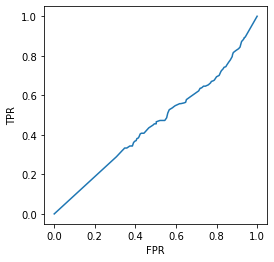

In [37]:
performance_model(dtc_t,'Decision Tree after Tuning',plot=True)

### RANDOM FOREST

In [38]:
#4 Random Forest first model
print('RANDOM FOREST\n')
# rf = RandomForestClassifier(n_estimators=30, max_depth=20)
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
test_preds=rf.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)
print('-'*25)

mean_rf_cv_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

RANDOM FOREST


True Positives: 359
True Negatives: 118
False Positives: 176
False Negatives: 186
-------------------------
Mean Cross Validation Score for Random Forest Classifier: 55.46%


In [ ]:
plot_feature_importances(rf)

In [69]:
rf_param_grid = {
    'n_estimators': [10,20,25,30,35,40,45],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10,15,18,20,25,30],
    'min_samples_split': [5,10,15,20,25,30,40],
    'min_samples_leaf': [1, 2, 5,10]
}

In [71]:
import time
start = time.time()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

KeyboardInterrupt: 

In [115]:
#Let's run the optimal model
print('RANDOM FOREST\n')
rf = RandomForestClassifier(n_estimators=25,criterion='gini',min_samples_split=40,min_samples_leaf=10)
rf.fit(X_train_scaled, y_train)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

print('-------------------------------')

mean_rf_cv_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

RANDOM FOREST


True Positives: 491
True Negatives: 27
False Positives: 303
False Negatives: 18
-------------------------------
Mean Cross Validation Score for Random Forest Classifier: 62.16%


Random Forest after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6803816338700059
-> Precision Score: 0.8911290322580645
-> Recall Score: 0.174565560821485
-> F1 Score: 0.2919418758256275
-> AUC: 0.815777208815287

** TESTING PERFORMANCE
-> Accuracy Score: 0.6162097735399285
-> Precision Score: 0.58
-> Recall Score: 0.08787878787878788
-> F1 Score: 0.1526315789473684
-> AUC: 0.5753884622253973



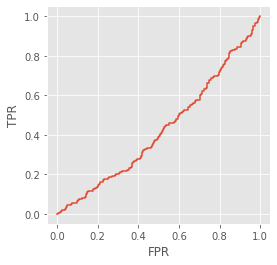

In [116]:
performance_model(rf,'Random Forest after tuning',plot=True)

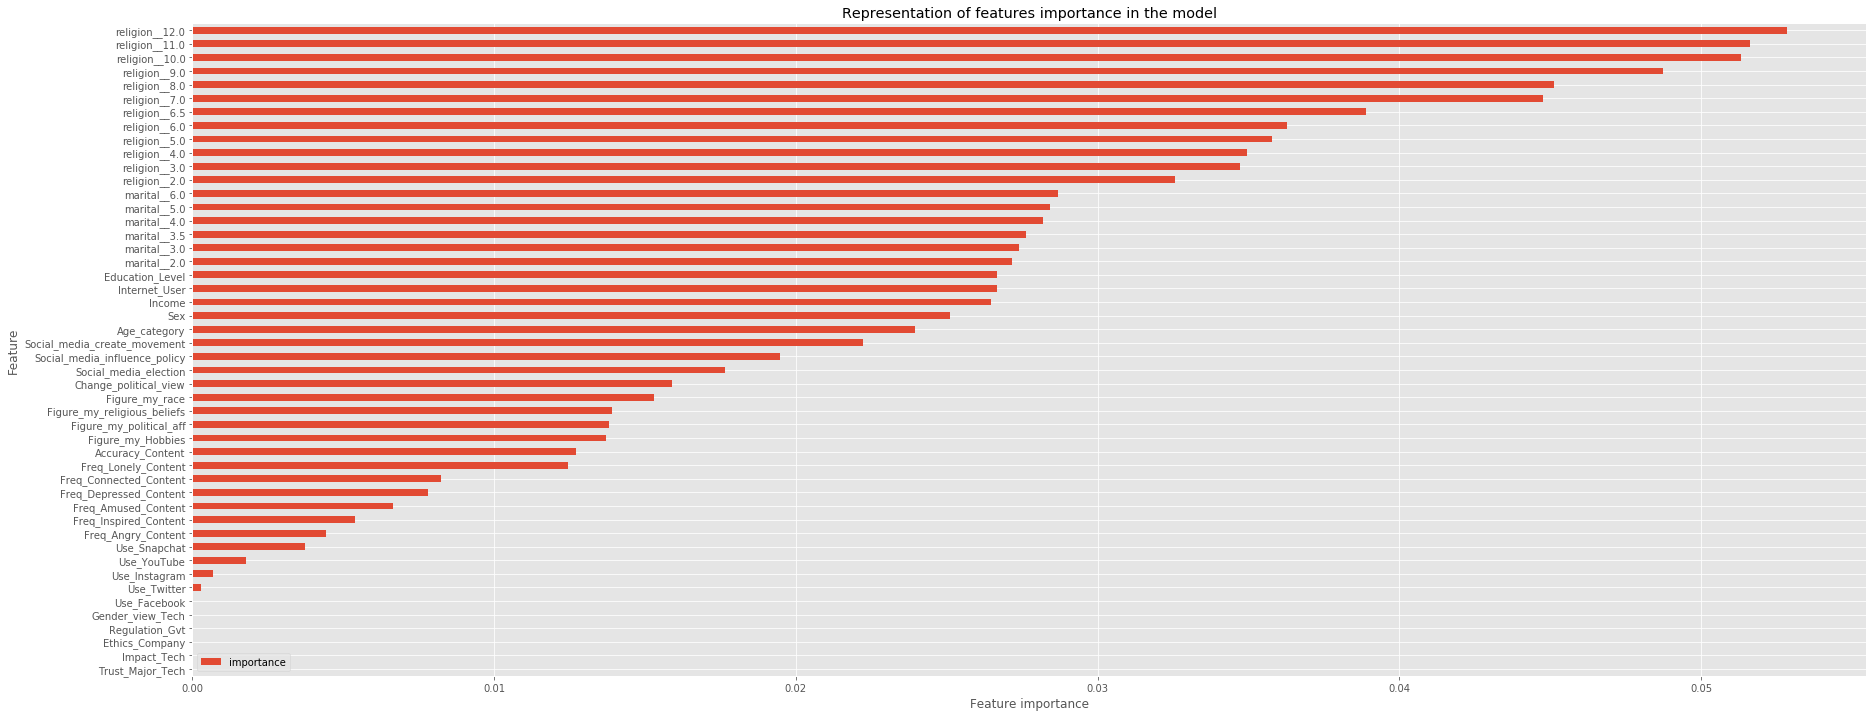

In [117]:
plot_feature_importances(rf)

### ADABOOST

In [118]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 61.27%


In [119]:
adaboost_param_grid = {
    'n_estimators': [10,20,25,30,35,40,45],
    'learning_rate': [1.0, 0.75,0.5, 0.25, 0.1]
}

In [120]:
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_train_scaled, y_train)

print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 62.7%

Optimal Parameters: {'learning_rate': 0.75, 'n_estimators': 10}


In [126]:
#run the model based on the hyperparameter found
adaboost_clf = AdaBoostClassifier(learning_rate=0.75,n_estimators=40)
adaboost_clf.fit(X_train_scaled, y_train)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)


True Positives: 459
True Negatives: 62
False Positives: 268
False Negatives: 50


,0,1
0,62,268
1,50,459


Adaboost
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6359570661896243
-> Precision Score: 0.5566750629722922
-> Recall Score: 0.174565560821485
-> F1 Score: 0.26578472639807577
-> AUC: 0.6331907522410465

** TESTING PERFORMANCE
-> Accuracy Score: 0.6209773539928486
-> Precision Score: 0.5535714285714286
-> Recall Score: 0.18787878787878787
-> F1 Score: 0.28054298642533937
-> AUC: 0.5884473417872238



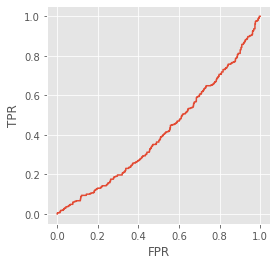

In [127]:
performance_model(adaboost_clf,"Adaboost",plot=True)

### XGBOOST

In [128]:
#baseline
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test_scaled)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 62.22%
Validation accuracy: 62.46%


In [129]:
#Tuning
param_grid = {
    "learning_rate": [1.0,0.5, 0.1],
    'max_depth': [5,15,20],
    'min_child_weight': [10,15],
    'subsample': [ 0.7],
    'n_estimators': [15, 25, 30, 45],
}

In [130]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_scaled, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_scaled)
val_preds = grid_clf.predict(X_test_scaled)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 15
n_estimators: 15
subsample: 0.7

Training Accuracy: 66.31%
Validation accuracy: 60.19%


In [137]:
#Let's run with the optimal parameter
xgb_clf = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,min_child_weight=15,n_estimators=15,subsample=0.7)
xgb_clf.fit(X_train_scaled, y_train)
print('XGBoost')
print('-'*20)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

XGBoost
--------------------

True Positives: 471
True Negatives: 34
False Positives: 296
False Negatives: 38


,0,1
0,34,296
1,38,471


XGBoost after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6630888491353608
-> Precision Score: 0.7361111111111112
-> Recall Score: 0.1674565560821485
-> F1 Score: 0.2728442728442728
-> AUC: 0.6983358225442308

** TESTING PERFORMANCE
-> Accuracy Score: 0.601907032181168
-> Precision Score: 0.4722222222222222
-> Recall Score: 0.10303030303030303
-> F1 Score: 0.16915422885572137
-> AUC: 0.5683336310055367



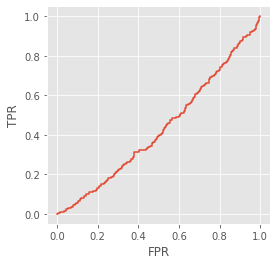

In [138]:
performance_model(xgb_clf,"XGBoost after tuning",plot=True)

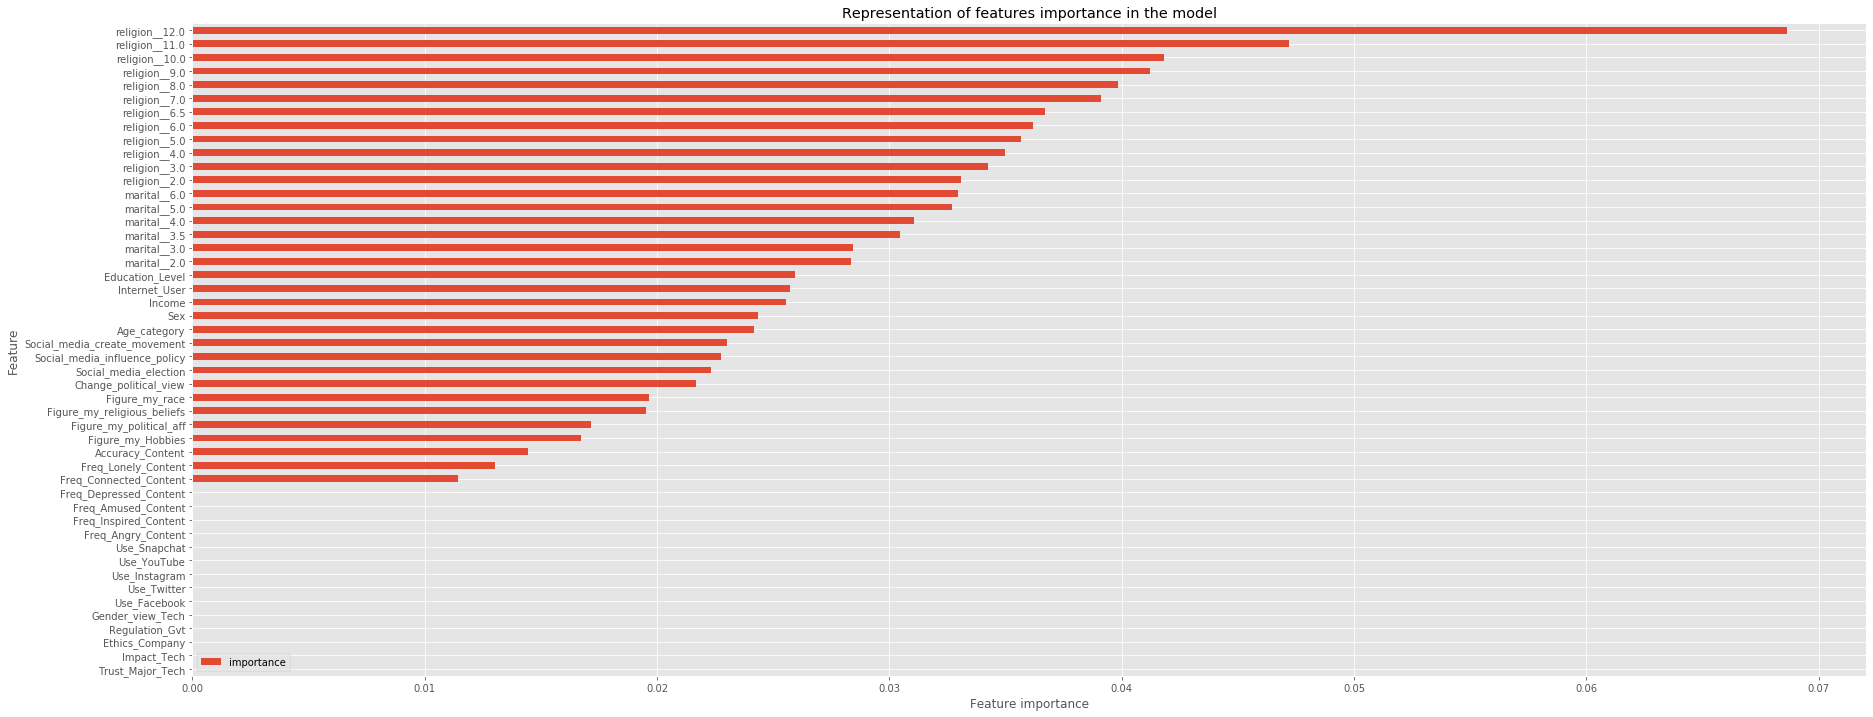

In [139]:
plot_feature_importances(xgb_clf)